**Image Resizing**

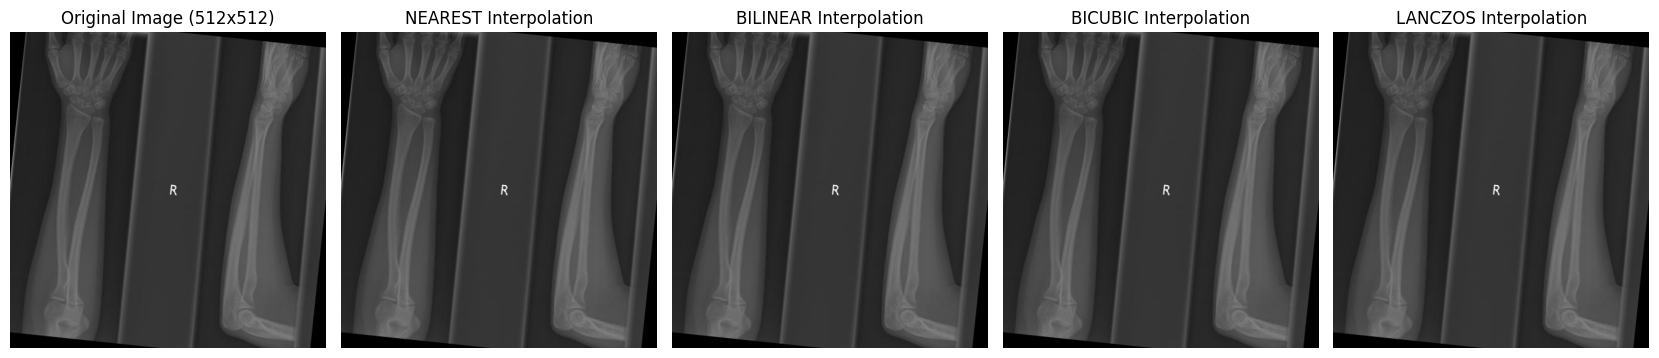

In [4]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms

# Define the directory containing the dataset
dataset_dir = "/home/elt/rw372/notebook/COMP8260 - A.I Systems/Project/Dataset"

# Get the list of image files in the directory
image_files = []
for root, _, files in os.walk(os.path.join(dataset_dir, 'train', 'images')):
    for file in files:
        if file.endswith(".jpg"):
            image_files.append(os.path.join(root, file))

# Choose a random image from the list
random_image_path = np.random.choice(image_files)

# Define different interpolation methods
interpolation_methods = ['NEAREST', 'BILINEAR', 'BICUBIC', 'LANCZOS']

# Function to visualize resized images with different interpolation methods
def visualize_resized_images(image_path, interpolation_methods):
    # Open the original image
    original_image = Image.open(image_path)

    # Resize original image to 512x512
    resize_transform = transforms.Resize((512, 512))
    resized_original = resize_transform(original_image)

    # Plot original image
    plt.figure(figsize=(20, 4))
    plt.subplot(1, len(interpolation_methods) + 2, 1)
    plt.imshow(resized_original)
    plt.title('Original Image (512x512)')
    plt.axis('off')

    # Apply each interpolation method and plot the resized image
    for i, method in enumerate(interpolation_methods, start=2):
        # Convert interpolation method name to Pillow constant
        interpolation = getattr(Image, method)
        # Define transformation with the specified interpolation method
        transform = transforms.Resize(resized_original.size, interpolation=interpolation)
        # Apply transformation to the image
        resized_image = transform(resized_original)
        # Plot resized image
        plt.subplot(1, len(interpolation_methods) + 2, i)
        plt.imshow(resized_image)
        plt.title(f'{method} Interpolation')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Visualize resized images with different interpolation methods
visualize_resized_images(random_image_path, interpolation_methods)

**Dataset Size Conversion**

In [5]:
import os
from PIL import Image

def resize_image(image_path, target_size=(256, 256)):
    with Image.open(image_path) as img:
        resized_img = img.resize(target_size)
    return resized_img

def create_folder_if_not_exists(folder_path):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

def convert_dataset(source_dir, destination_dir):
    for root, dirs, files in os.walk(source_dir):
        for dir in dirs:
            source_sub_dir = os.path.join(root, dir)
            dest_sub_dir = os.path.join(destination_dir, os.path.relpath(source_sub_dir, source_dir))
            create_folder_if_not_exists(dest_sub_dir)
        
        for file in files:
            if file.endswith(".jpg"):  # Assuming images are in JPEG format
                image_path = os.path.join(root, file)
                rel_root = os.path.relpath(root, source_dir)
                label_folder_path = os.path.join(destination_dir, rel_root)
                
                # Resize image
                resized_img = resize_image(image_path)
                
                # Save resized image
                save_path = os.path.join(label_folder_path, file)
                resized_img.save(save_path)

# Define source and destination directories
source_directory = '/home/elt/rw372/notebook/COMP8260 - A.I Systems/Project/Dataset'
destination_directory = '/home/elt/rw372/notebook/COMP8260 - A.I Systems/Project/Roberts Work - PrePro & Size ChangeDataset/3) Different Pre-Processing Methods/Converted_Dataset'

# Convert dataset
convert_dataset(source_directory, destination_directory)

print("Dataset conversion completed.")

Dataset conversion completed.
